<a href="https://colab.research.google.com/github/swapnil-092/Vehicle_Detection_CNN_python/blob/main/Vehicles_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import cv2
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [11]:
!kaggle datasets download -d brsdincer/vehicle-detection-image-set

 91% 109M/119M [00:01<00:00, 114MB/s] 
100% 119M/119M [00:01<00:00, 110MB/s]


In [12]:
zip_ref = zipfile.ZipFile('/content/vehicle-detection-image-set.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [13]:
print(os.listdir('/content/data/'))

['non-vehicles', 'vehicles']


In [33]:
dataset_dir = '/content/data/'
# Load the dataset and labels
X = []
y = []
for folder_name in os.listdir(dataset_dir):
    if folder_name.startswith('non-vehicle'):
        label = 0  # non-vehicle class label
    else:
        label = 1  # vehicle class label

    folder_path = os.path.join(dataset_dir, folder_name)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # resize image to a fixed size
        X.append(image)
        y.append(label)

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train/ 255.0
X_test = X_test / 255.0

In [37]:
X_train.shape

(14208, 32, 32, 3)

In [38]:
classes = ['Non-vehicles','Vehicles']

In [39]:
y_train[:5]

array([1, 0, 1, 0, 1])

In [40]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([1, 0, 1, 0, 1])

In [41]:
y_test = y_test.reshape(-1,)

In [42]:
classes = ['Non-vehicles','Vehicles']

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

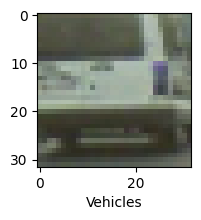

In [43]:
plot_sample(X_train, y_train, 0)


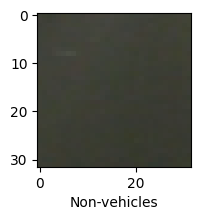

In [44]:
plot_sample(X_train, y_train, 1)

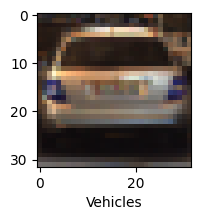

In [45]:
plot_sample(X_train, y_train, 2)

In [55]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
444/444 [==============================] - 38s 84ms/step - loss: 0.3756 - accuracy: 0.8464
Epoch 2/5
444/444 [==============================] - 37s 83ms/step - loss: 0.2506 - accuracy: 0.9003
Epoch 3/5
444/444 [==============================] - 38s 86ms/step - loss: 0.2100 - accuracy: 0.9165
Epoch 4/5
444/444 [==============================] - 38s 86ms/step - loss: 0.1866 - accuracy: 0.9262
Epoch 5/5
444/444 [==============================] - 38s 86ms/step - loss: 0.1622 - accuracy: 0.9411


In [56]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

111/111 [==============================] - 2s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1790
           1       0.95      0.95      0.95      1762

    accuracy                           0.95      3552
   macro avg       0.95      0.95      0.95      3552
weighted avg       0.95      0.95      0.95      3552



In [124]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [125]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [126]:
history = cnn.fit(X_train,y_train,epochs = 10, validation_data=(X_test,y_test))

Epoch 1/10
444/444 [==============================] - 20s 43ms/step - loss: 0.2581 - accuracy: 0.8962 - val_loss: 0.1086 - val_accuracy: 0.9651
Epoch 2/10
444/444 [==============================] - 20s 45ms/step - loss: 0.0921 - accuracy: 0.9682 - val_loss: 0.0725 - val_accuracy: 0.9780
Epoch 3/10
444/444 [==============================] - 19s 42ms/step - loss: 0.0618 - accuracy: 0.9773 - val_loss: 0.0544 - val_accuracy: 0.9809
Epoch 4/10
444/444 [==============================] - 21s 48ms/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.0532 - val_accuracy: 0.9811
Epoch 5/10
444/444 [==============================] - 19s 42ms/step - loss: 0.0375 - accuracy: 0.9870 - val_loss: 0.0424 - val_accuracy: 0.9856
Epoch 6/10
444/444 [==============================] - 22s 49ms/step - loss: 0.0302 - accuracy: 0.9892 - val_loss: 0.0348 - val_accuracy: 0.9865
Epoch 7/10
444/444 [==============================] - 19s 43ms/step - loss: 0.0246 - accuracy: 0.9913 - val_loss: 0.0362 - val_accuracy:

In [127]:
cnn.evaluate(X_test,y_test)

111/111 [==============================] - 1s 10ms/step - loss: 0.0859 - accuracy: 0.9707


[0.08586093783378601, 0.9707207083702087]

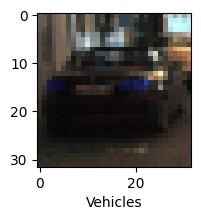

In [128]:
plot_sample(X_test,y_test,10)

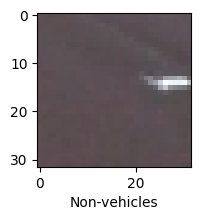

In [129]:
plot_sample(X_test,y_test,4)

In [130]:
y_pred = cnn.predict(X_test)
y_pred[:10]

111/111 [==============================] - 1s 10ms/step


array([[1.0176750e-05, 9.9998981e-01, 6.5071776e-10, 5.7580501e-10,
        3.4836805e-09, 7.8749212e-09, 2.2902118e-09, 1.0407765e-09,
        8.0988425e-09, 4.8863864e-09],
       [7.4113855e-06, 9.9999255e-01, 8.5275433e-11, 2.2589203e-10,
        4.0658896e-10, 6.5153177e-10, 2.4443020e-10, 7.3957847e-11,
        3.8474518e-10, 4.4735879e-10],
       [1.2875620e-07, 9.9999982e-01, 6.0140288e-13, 2.5129039e-13,
        6.1984558e-12, 2.7728733e-11, 4.1390281e-12, 2.0361540e-12,
        3.3843182e-11, 1.4577218e-11],
       [9.9999994e-01, 6.3353749e-12, 1.0351499e-14, 2.4849380e-15,
        3.7429912e-15, 1.5206101e-14, 9.3852513e-15, 1.5573199e-15,
        7.5799081e-15, 1.3102497e-15],
       [9.9647355e-01, 3.5093566e-03, 2.3163818e-06, 1.0732440e-06,
        1.5203232e-06, 3.8002624e-06, 3.3577937e-06, 1.0924567e-06,
        1.8212760e-06, 2.0635755e-06],
       [9.9999779e-01, 2.1145675e-06, 1.8298389e-09, 8.8784119e-10,
        4.9755050e-10, 1.7678802e-09, 6.6668571e-10, 3.43

In [131]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1]

In [132]:
classes[y_classes[10]]

'Vehicles'

In [133]:
classes[y_classes[4]]

'Non-vehicles'

In [134]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1790
           1       0.95      0.99      0.97      1762

    accuracy                           0.97      3552
   macro avg       0.97      0.97      0.97      3552
weighted avg       0.97      0.97      0.97      3552



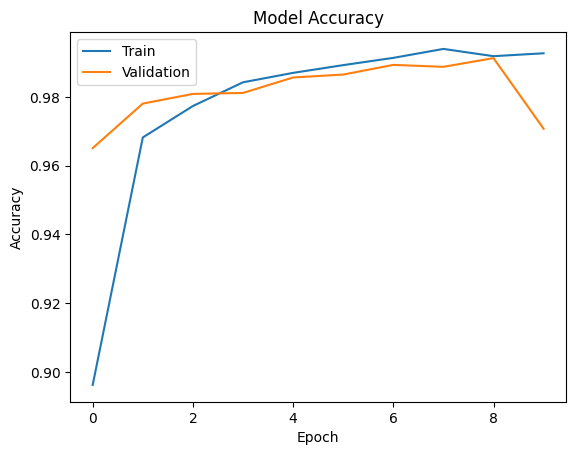

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

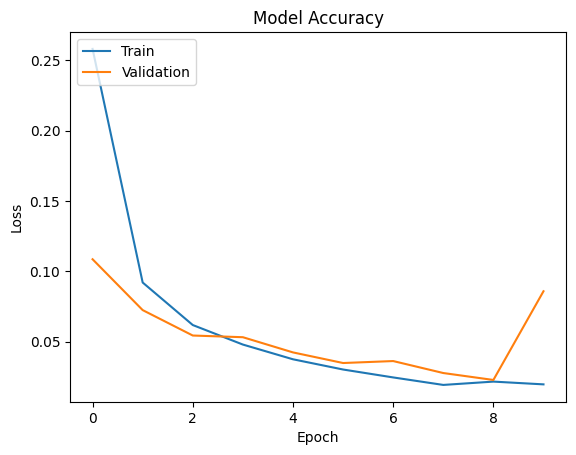

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()